<a href="https://colab.research.google.com/github/kahuroA/Descriptive-Statistics-Excercises/blob/main/Copy_of_Bivariate_Analysis_(Exploratory_Data_Analysis)_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Bivariate Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Determine relationship between age and the positive lymph nodes among cancer patients.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/CancerSurvivalDataset
# ---
# Attribute Information:
# 20 - Age of patient at time of operation 
# 64 - Patient's year of operation (year - 1900)
# 1 - Number of positive axillary nodes detected 
# 1 - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
# ---
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style()

#c_data = pd.read_csv('http://bit.ly/CancerSurvivalDataset',header=None, names=['Age','Year of operation','positive axilliary nodes','survival status'])
c_data = pd.read_csv('http://bit.ly/CancerSurvivalDataset')

## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
c_data.shape

(305, 4)

In [3]:
# Previewing the top of our dataset
c_data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
# Previewing the bottom of our dataset
c_data.tail()

,30,64,1,1.1
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [5]:
# Checking whether each column has an appropriate datatype
c_data.dtypes

30     int64
64     int64
1      int64
1.1    int64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

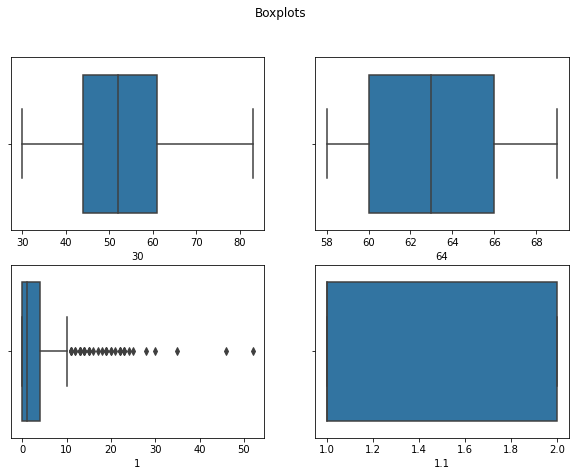

In [6]:
# Checking for Outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(c_data['30'], ax=ax1)
sns.boxplot(c_data['64'], ax=ax2)
sns.boxplot(c_data['1'], ax=ax3)
sns.boxplot(c_data['1.1'], ax=ax4)
plt.show()

In [ ]:
# Checking for Anomalies
#
q1_30 = c_data['30'].quantile(.25)
q3_30 = c_data['30'].quantile(.75)

iqr_30 = q3_30 - q1_30


q1_64 = c_data['64'].quantile(.25)
q3_64 = c_data['64'].quantile(.75)

iqr_64 = q3_64 - q1_64

q1_1 = c_data['1'].quantile(.25)
q3_1 = c_data['1'].quantile(.75)

iqr_1 = q3_1 - q1_1

q1_11 = c_data['1.1'].quantile(.25)
q3_11 = c_data['1.1'].quantile(.75)

iqr_11 = q3_11 - q1_11

# Or

q1_3, q3_3 = np.percentile(c_data['30'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_1 - (1.5*iqr)
u_bound = q3_3 + (1.5 * iqr)

print(iqr_30, iqr)

17.0 17.0


In [ ]:
# Identifying the Missing Data
#

In [ ]:
# Dealing with the Missing Data
c_data.isnull().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [ ]:
# More data cleaning procedures
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
#rename the columns
#['Age','Year of operation','positive axilliary nodes','survival status']
c_data.rename(columns={'30':'Age','64':'Year of Operation','1':'positive axilliary nodes','1.1':'survival status'}, inplace=True)

## 6. Exploratory Analysis

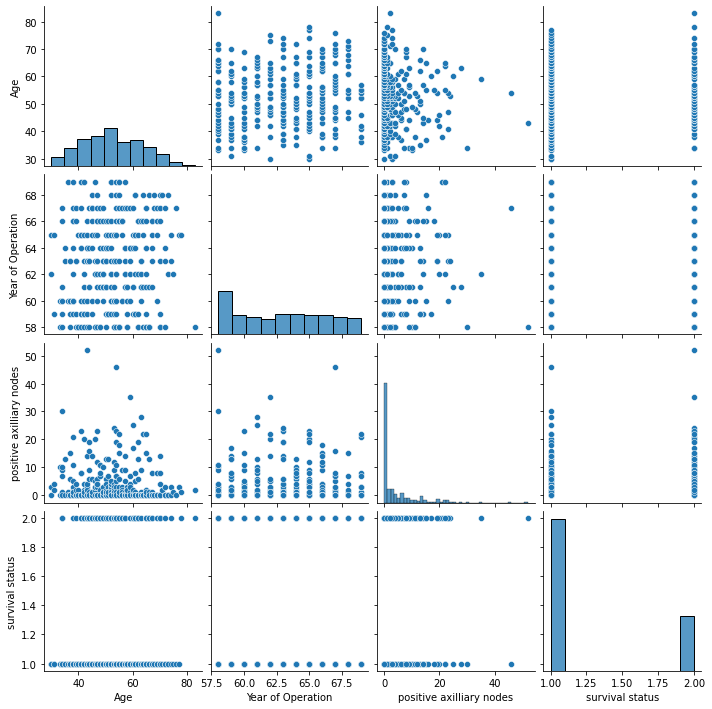

In [8]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(c_data)
plt.show()

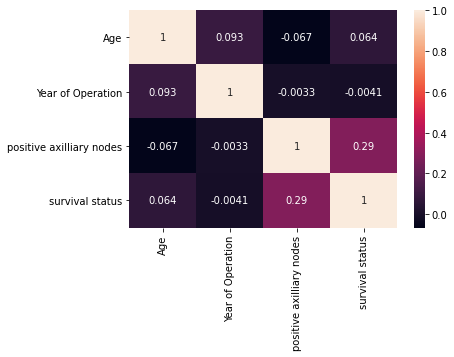

In [9]:
sns.heatmap(c_data.corr(),annot=True)
plt.show()

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

In [10]:
#we will use pearsons correlation as the metric for relationship
c_data['Age'].corr(c_data['positive axilliary nodes'])

-0.06654808924041002

In [ ]:
#from above there is a very weak negative linear relationship between Age and positive axilliary

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [11]:
# Reviewing the Solution 
#Because the positive axilliary variable has outliers and it's distribution is skewed, using pearson's correlation is not appropriate
#In tis case we can use Spearman's rank correlation which mitigates the effects of outliers and skewed distributions
c_data['Age'].corr(c_data['positive axilliary nodes'], method='spearman')

-0.09788393178416328

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?